## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

One way to define the data science process is as follows:

1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

<b>Problem Statment:</b> lefthandedness might correlated with extrovert personalities </b>

---
## Step 2: Obtain the data.

### Read in the file titled "data.csv":
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [6]:
# library imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [7]:
df = pd.read_csv('data.csv', sep = '\t')
df.columns = df.columns.str.lower().str.replace(' ', '_')

---

## Step 3: Explore the data.

### Conduct background research:

Domain knowledge is irreplaceable. Figuring out what information is relevant to a problem, or what data would be useful to gather, is a major part of any end-to-end data science project! For this lab, you'll be using a dataset that someone else has put together, rather than collecting the data yourself.

Do some background research about personality and handedness. What features, if any, are likely to help you make good predictions? How well do you think you'll be able to model this? Write a few bullet points summarizing what you believe, and remember to cite external sources.

You don't have to be exhaustive here. Do enough research to form an opinion, and then move on.

> You'll be using the answers to Q1-Q44 for modeling; you can disregard other features, e.g. country, age, internet browser.

### Conduct exploratory data analysis on this dataset:

If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

You might use this section to perform data cleaning if you find it to be necessary.

In [8]:
df.shape, df.dtypes, df.isnull().sum()

((4184, 56),
 q1              int64
 q2              int64
 q3              int64
 q4              int64
 q5              int64
 q6              int64
 q7              int64
 q8              int64
 q9              int64
 q10             int64
 q11             int64
 q12             int64
 q13             int64
 q14             int64
 q15             int64
 q16             int64
 q17             int64
 q18             int64
 q19             int64
 q20             int64
 q21             int64
 q22             int64
 q23             int64
 q24             int64
 q25             int64
 q26             int64
 q27             int64
 q28             int64
 q29             int64
 q30             int64
 q31             int64
 q32             int64
 q33             int64
 q34             int64
 q35             int64
 q36             int64
 q37             int64
 q38             int64
 q39             int64
 q40             int64
 q41             int64
 q42             int64
 q43             int6

In [9]:
df.drop(columns=['introelapse','testelapse','engnat','age','religion','country','fromgoogle'], inplace=True)

In [10]:
df['hand'].value_counts() 

1    3542
2     452
3     179
0      11
Name: hand, dtype: int64

1: right-handed | 2: left-handed | 3: both-handed | 0: -

In [11]:
df = pd.get_dummies(data=df, columns=['hand'], drop_first=True)

In [12]:
# I chose to combine Left and Both together
# use left [1] <--> not left [0]
df['left'] = df['hand_2'] + df['hand_3']

In [13]:
df.drop(columns=['hand_1','hand_2','hand_3','q43'], inplace=True)
# q43 is the duplicate --> drop it

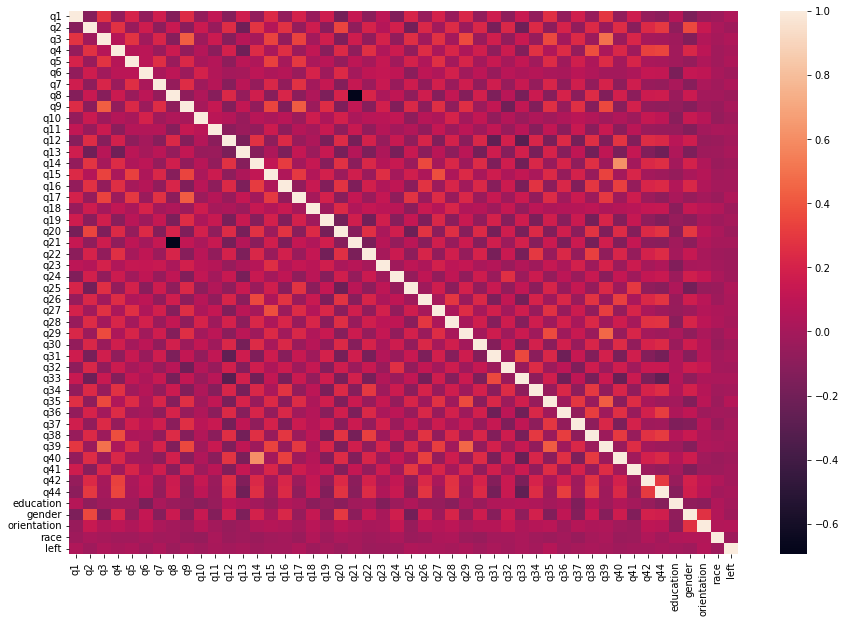

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr());

### Calculate and interpret the baseline accuracy rate:

In [15]:
# Zero rule algorrithm 
# Not left-handed / All

round(3542 / (3542+452+179),3)

0.849

### Short answer questions:

In this lab you'll use K-nearest neighbors and logistic regression to model handedness based off of psychological factors. Answer the following related questions; your answers may be in bullet points.

#### Describe the difference between regression and classification problems:

- regression helps predict a continuous quantity
- classification predicts discrete class labels

#### Considering $k$-nearest neighbors, describe the relationship between $k$ and the bias-variance tradeoff:

- As k increases --> variance [↓], bias [↑] 
- As k decreases --> bias [↓], variance [↓]

#### Why do we often standardize predictor variables when using $k$-nearest neighbors?

$\;\;\;\;\;\;$ The goal of normalization is to change the values of numeric columns to use a common scale, without distorting differences in the ranges of values or losing information.

Standardization --> rescales values in features col.(X) to have each column possess a mean ~ 0 and std ~ 1



#### Do you think we should standardize the explanatory variables for this problem? Why or why not?

$\;\;\;\;\;\;$  It is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN, but all features are ranged from 1-5 (on the same scale)

#### How do we settle on $k$ for a $k$-nearest neighbors model?

$\;\;\;\;\;\;$ The optimal K value usually found is the square root of N, where N is the total number of samples. Use an error plot or accuracy plot to find the most favorable K value.

#### What is the default type of regularization for logistic regression as implemented in scikit-learn? (You might [check the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).)

$\;\;\;\;\;\;$ L2 penalty or "Ridge regression" is set as default

#### Describe the relationship between the scikit-learn `LogisticRegression` argument `C` and regularization strength:

$\;\;\;\;\;\;$ C (default=1.0) is  an inverse of regularization strength (must be a positive float). C=1/alpha

#### Describe the relationship between regularization strength and the bias-variance tradeoff:

Trade-off means you have to lose something to gain something
- low-bias/high-variance model (overfitting) 
- high-bias/low-variance model (underfitting) 

What we do is to reach around middle ground where dependent variable \
are not influential in the final model.

#### Logistic regression is considered more interpretable than $k$-nearest neighbors. Explain why.

| KNN | LR | 
| --- | --- | 
| non-parametric model | parametric model |
| supports non-linear solutions | supports only linear solutions |
| can only output the labels | can derive confidence level |

kNN isn't too hard to explain to a wide audience \
LogReg is for explaining relationships in a menaingful and actionable way

---

## Step 4 & 5 Modeling: $k$-nearest neighbors

### Train-test split your data:

Your explanatory variables should be 

In [16]:
X = df.drop(columns=['left'])
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=69, stratify=y)
# ---------------------------------------------------------------------------------- #
# I'll scaled it anyway - teehee
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test  = sc.transform(X_test)

#### Create and fit four separate $k$-nearest neighbors models: one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$:

In [17]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier

---

In [37]:
k_scores =pd.DataFrame(columns=['k','train_score','test_score','pred_lt'])

for n, k in enumerate([3,5,15,25]):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    minor_class = y_pred == 1
    pred_lt = pd.Series(minor_class).sum()
    train_score = knn.score(X_train,y_train)
    test_score  = knn.score(X_test, y_test)
    k_scores.loc[n] = [k, train_score,test_score, pred_lt]

In [38]:
k_scores

,k,train_score,test_score,pred_lt
0,3.0,0.870937,0.797323,76.0
1,5.0,0.855003,0.820268,40.0
2,15.0,0.849267,0.847036,2.0
3,25.0,0.849267,0.848948,0.0


In [40]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
pd.Series(y_preds).value_counts()

0    970
1     76
dtype: int64

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_preds)
cm

array([[823,  65],
       [147,  11]], dtype=int64)

---

In [13]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print(f' k = 3')
print(f' Training Score: {round(knn.score(Z_train,y_train),3)}')
print(f' Testing Score:  {round(knn.score(Z_test,y_test),3)}')

 k = 3
 Training Score: 0.258
 Testing Score:  0.246


In [14]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
print(f' k = 5')
print(f' Training Score: {round(knn.score(Z_train,y_train),3)}')
print(f' Testing Score:  {round(knn.score(Z_test,y_test),3)}')

 k = 5
 Training Score: 0.443
 Testing Score:  0.417


In [15]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
print(f' k = 15')
print(f' Training Score: {round(knn.score(Z_train,y_train),3)}')
print(f' Testing Score:  {round(knn.score(Z_test,y_test),3)}')

 k = 15
 Training Score: 0.849
 Testing Score:  0.849


In [16]:
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train)
print(f' k = 25')
print(f' Training Score: {round(knn.score(Z_train,y_train),3)}')
print(f' Testing Score:  {round(knn.score(Z_test,y_test),3)}')

 k = 25
 Training Score: 0.849
 Testing Score:  0.849


|| k=3 | k=5 | k=15 | k=25 
| --- | --- | --- | --- | --- | 
| Train Score: | 0.258 | 0.443 | 0.849| 0.849 |
| Test Score: | 0.246 | 0.417 | 0.849 | 0.849 |

### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. Are any of your models overfit or underfit? Do any of your models beat the baseline accuracy rate?

- knn which k=3 and k=5 have higher train score than test score which indicate Overfitting
- None of these model beats the baseline score

###### Options

Addressing the class labal imbalance (switching k @ 91/10 split made no significant diff. in models predictive accuracy

- Oversampling the minority class
- Undersampling the majority class
- a bit both: SMOTE --> Synthetic Minority Over-sampling Technique \
    - Algorithmically increase the number of your cases in your dataset in a more balanced way


---

## Step 4 & 5 Modeling: logistic regression

#### Create and fit four separate logistic regression models: one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

Note: You can use the same train and test data as above.

In [17]:
#Lasso , alpha = 1
logr = LogisticRegression(C=1, penalty='l1', solver='liblinear')
logr.fit(Z_train, y_train)
logr.fit(Z_test, y_test)
print(f' Training Score: {round(logr.score(Z_train,y_train),3)}')
print(f' Testing Score:  {round(logr.score(Z_test,y_test),3)}')

 Training Score: 0.847
 Testing Score:  0.849


In [18]:
#Lasso , alpha = 10
logr = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
logr.fit(Z_train, y_train)
logr.fit(Z_test, y_test)
print(f' Training Score: {round(logr.score(Z_train,y_train),3)}')
print(f' Testing Score:  {round(logr.score(Z_test,y_test),3)}')

 Training Score: 0.849
 Testing Score:  0.849


In [19]:
#Ridge , alpha = 1
logr = LogisticRegression(C=1, penalty='l2', solver='saga')
logr.fit(Z_train, y_train)
logr.fit(Z_test, y_test)
print(f' Training Score: {round(logr.score(Z_train,y_train),3)}')
print(f' Testing Score:  {round(logr.score(Z_test,y_test),3)}')

 Training Score: 0.845
 Testing Score:  0.849


In [20]:
#Ridge , alpha = 10
logr = LogisticRegression(C=0.1, penalty='l2', solver='saga')
logr.fit(Z_train, y_train)
logr.fit(Z_test, y_test)
print(f' Training Score: {round(logr.score(Z_train,y_train),3)}')
print(f' Testing Score:  {round(logr.score(Z_test,y_test),3)}')

 Training Score: 0.847
 Testing Score:  0.849


### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. Are any of your models overfit or underfit? Do any of your models beat the baseline accuracy rate?

|| l1,α1 | l1,α10 | l2,α1 | l2,α10 | 
| --- | --- | --- | --- | --- | 
| Train Score: | 0.847 | 0.849 | 0.845 | 0.847 |
| Test Score: | 0.849 |  0.849 | 0.849 | 0.849 |

- All of them are underfit
- All of then beat the baseline accuracy rate
- l1 penalty with α=10 seem to be the best one among these four
- None of these model beats baseline score


---

## Step 6: Answer the problem.

Are any of your models worth moving forward with? What are the "best" models?

- None of these model worth moving forward with and should be tinkle a little bit more
- The best model would be K-nearest neighbors with K(n_neighbors) = 15